### preliminary work: Importing packages
note the addition of `% matplotlib inline`. This allows us to plot functions without having to call the command `plt.show()` . 



In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [5]:
! git clone https://github.com/envgp/sample_jupyter_notebook_data.git

fatal: destination path 'sample_jupyter_notebook_data' already exists and is not an empty directory.


# Plotting in 2D and 3D

If you've completed the notebook on 1D plotting (found here), you should recognize that we've established a basic protocol for analzying geophysical data in Python.

1. Find some data.
2. Load the data into Python and store it in a list or array.
3. Plot the data so we can see what it looks like.
4. Manipulate the data arrays and do "something" to them.
5. Replot the data to see the effect of the "something" that we did to it.
6. Repeat 4. and 5. until we're happy with the results.

One-dimensional plotting is useful for looking at time-series data, but as geophysicists, we are also concerned with plotting data in a spatial domain.  We want to find where something is in the subsurface, and 1D plots are insufficient.  We must expand to 2D plots and in some cases, 3D plots.  

Thank you to Nick Wagner for reviewing this notebook.

## A basic 2D meshgrid plot

When we looked at plotting in one dimension, each position in a time-series (or any one-dimensional series) had a single data point at that position. The relationship between position and data was 1:1. (One magnetic field strength value for every point in time, one rainfall measurement for every point in time, etc.) In a two-dimensional plot, each coordinate pair has an associated data point. By extension, each point on an axis has a row or column of data associated with it. We have to be smarter about how we generate and assign our data to their linked positions.

np.meshgrid() will take in any number of one-dimensional arrays and return the same number of two-dimensional arrays, where each two-dimensional array is composed of one component of the above mentioned coordinate pair.

This concept may not be intuitive, so let's walk through two different examples to reinforce the process.


### step zero: load in data
Before we can begin to set up our data for plotting, we need to load it in. This is a dataset collected by some grad students studying under Rich Krahenbuhl at the Colorado School of Mines. It has three components: x location, y location, and a series of uncorrected data for the EM-31.

In [6]:
##loading in the dataset
temp=np.genfromtxt('sample_jupyter_notebook_data/em31_in_phase.txt')
xo=temp[:,0] #x location (easting)
yo=temp[:,1] #y location (northing)
zo=temp[:,2] #uncorrected data

### step one: create a mesh grid
Now that we have a dataset, and each column as three one dimensional arrays, we can start making our mesh grid of x and y values. What we are essentially doing is taking two 1D arrays, [x,] and [y,] and making them into 2D arrays, [x,y]. one 2D array for each component. With these arrays, we can interpolate a z value at any point on the grid. If you are curious about how `np.meshgrid()` works, check out [this link](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html).

In [7]:
##creating a model meshgrid
xmin=np.min(xo)
xmax=np.max(xo)
dx=0.1
ymin=np.min(yo)
ymax=np.max(yo)
dy=0.1
xgrid=np.arange(xmin,xmax,dx) # our 1D array of x point
ygrid=np.arange(ymin,ymax,dy) # our 1D array of y points
xg,yg=np.meshgrid(xgrid,ygrid) # our 2D (x,y) array
# xg contains all the x information of our 2D [x,y] array
# yg contains all the y information of our 2D [x,y] array

Let's quickly hit the pause button and just print out the meshgrid values so we can visually seeing what the meshgrid looks like.

In [8]:
print('X component of 2D array')
print(xg[:10])
print('Y component of 2D array')
print(yg[:10])

X component of 2D array
[[ 0.   0.1  0.2 ... 15.7 15.8 15.9]
 [ 0.   0.1  0.2 ... 15.7 15.8 15.9]
 [ 0.   0.1  0.2 ... 15.7 15.8 15.9]
 ...
 [ 0.   0.1  0.2 ... 15.7 15.8 15.9]
 [ 0.   0.1  0.2 ... 15.7 15.8 15.9]
 [ 0.   0.1  0.2 ... 15.7 15.8 15.9]]
Y component of 2D array
[[0.  0.  0.  ... 0.  0.  0. ]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.2 0.2 0.2 ... 0.2 0.2 0.2]
 ...
 [0.7 0.7 0.7 ... 0.7 0.7 0.7]
 [0.8 0.8 0.8 ... 0.8 0.8 0.8]
 [0.9 0.9 0.9 ... 0.9 0.9 0.9]]


### step two: interpolate the z values
Now that we have our mesh grid, we can interpolate a set of z values anywhere on our meshgrid. To do this, we are going to use scipy's `interpolate.griddata()` function. More information on this function can be found [here](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.interpolate.griddata.html)

In [9]:
##interpolate data to the grid

## xo and yo - original data collection locations
## zo - original data values
## xg and yg - meshgrid locations
zg = interpolate.griddata((xo,yo),zo,(xg,yg), 'cubic')
 

### step three: Plot everything out
Now that we have both a gridded dataset `[xg,yg]`, and a series of interpolated values for our grid, `zg`, we can plot everything. To do this, we will use matplotlib's `plt.pcolormesh()` function. This function many customization options through its arguments. For instance, you can change the color of the plot (for example, below we use `cmap='viridis'`), transparancy, and the range of values you actually display. You can check these out [here](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.pcolor.html). 

pcolormesh, and most plotting methods in Python, take locations in the form [y,x] rater than [x,y]. This is because in Python, we typically work and talk in terms of rows first, then columns second. In a physical space, the rows represent y/northing information, and the columns represent x/easting information (when using typical axes in North America. Of course, as geophysicists, our subdisciplines have all their own particular conventions, and we may work all over the world where different coordinate systems make more sense.) Just be wary of where your data is pointing (right-handed or left-handed coordinate system?) and how that translates to the Python plotting function you're using.

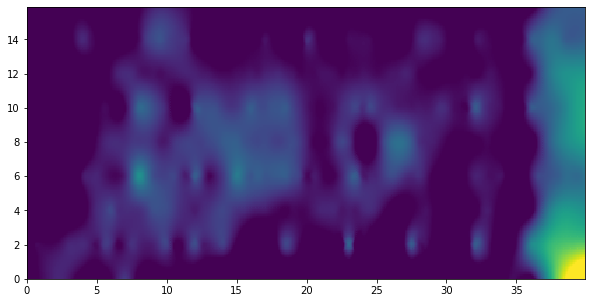

In [10]:
%matplotlib inline
##plot the data
plt.figure(figsize=(10,5))
##vmin and vmax tell the plotter to only plot between -5.5 and -2. this emphasizes the anamoly.
## pcolormesh arguments (row location, column location, z data) -> (yg,xg,zg)
plt.pcolormesh(yg,xg, zg, vmin=-5.5, vmax=-2.5, cmap='viridis')
plt.show()

## A second, expanded example
Story time. After a tough day in the field, you've managed to collect an amazing grid of magnetics data for an area that was subject to illegal burial of metal casings.  Some proprietary software can easily create a beautiful contour plot of your data with just a few clicks.  Unfortunately, your partner is extremely clumsy, and as you both return to your hotel room, exhausted, he knocks his laptop off the desk and completely breaks it.  You have no other way to access the software.

Your project stakeholders want some preliminary data tonight, so you decide to try some basic plotting in Python as a substitute.  Before plotting the actual data, you decide to quickly forward-model the magnetic response for a buried sphere.  This will help you get an idea of what the magnetic response for a casing should look like in your real data.

As you now know from the previous example, `np.meshgrid()` will take in any number of one-dimensional arrays and return the same number of two-dimensional arrays, where each two-dimensional array is composed of *one* component of the above mentioned coordinate pair/set.  

The below code will create two arrays, one representing points on the x-axis and the other representing points on the y-axis.  It then uses the meshgrid function to generate 2D arrays for the components of the coordinates on the x-y grid.  We'll then print them out to get an idea of what the meshgrid function is actually doing.

In [11]:
x = np.arange(-400, 400+1, 1)
y = np.arange(-400, 400+1, 1)

X, Y = np.meshgrid(x,y)
print(X)
print("\n")
print(Y)

[[-400 -399 -398 ...  398  399  400]
 [-400 -399 -398 ...  398  399  400]
 [-400 -399 -398 ...  398  399  400]
 ...
 [-400 -399 -398 ...  398  399  400]
 [-400 -399 -398 ...  398  399  400]
 [-400 -399 -398 ...  398  399  400]]


[[-400 -400 -400 ... -400 -400 -400]
 [-399 -399 -399 ... -399 -399 -399]
 [-398 -398 -398 ... -398 -398 -398]
 ...
 [ 398  398  398 ...  398  398  398]
 [ 399  399  399 ...  399  399  399]
 [ 400  400  400 ...  400  400  400]]


You may be slightly thrown off by the fact that the Y matrix's values increase downward instead of upward through the matrix.  There is nothing wrong with this; it is just a reflection of how the meshgrid function populates the array.  Our graphs will still come out normal.

Awesome, so now you have a meshgrid of points to apply to your foward model.  You quickly type up a function that can calculate the forward modeled magnetic response of a buried sphere (For learning purposes, treat this function as a black box and don't worry too much about the physics behind it).

In [12]:
def MagneticField(xprime, yprime, X, Y, strength, inc, dec, depth, radius, sus):
    '''Generate the total field anomaly for a given set of input parameters.
    Inputs: 
        xprime - x coordinate of sphere location
        yprime - y coordinate of sphere location
        X - x-coordinates over which to calculate the anomaly.
        Y - y-coordinates over which to calculate the anomaly.
        strength - strength of inducing field.
        inc - inclination of inducing field.
        dec - declination of inducing field.
        depth - depth of buried sphere.
        radius - radius of buried sphere.
        sus - magnetic suspectbility of buried sphere.
    '''
    Txy=(3*(xprime-X)*(yprime-Y))/((xprime-X)**2+(yprime-Y)**2+(depth)**2)**2.5

    Txz=(3*(xprime-X)*(depth))/((xprime-X)**2+(yprime-Y)**2+(depth)**2)**2.5

    Txx=(((xprime-X)**2+(yprime-Y)**2+(depth)**2)**-1.5)
    +(3*(xprime-X)**2/((xprime-X)**2+(yprime-Y)**2+(depth)**2)**2.5)

    Tyy=(((xprime-X)**2+(yprime-Y)**2+(depth)**2)**-1.5)
    +(3*(yprime-Y)**2)/(((xprime-X)**2+(yprime-Y)**2+(depth)**2)**2.5)

    Tyz=(3*(yprime-Y)*(depth))/((xprime-X)**2+(yprime-Y)**2+(depth)**2)**2.5

    Tzz=(((xprime-X)**2+(yprime-Y)**2+(depth)**2)**-1.5)
    +(3*(depth)**2)/(((xprime-X)**2+(yprime-Y)**2+(depth)**2)**2.5)
    
    Tensor = np.array([[Txx, Txy, Txz], 
                       [Txy, Tyy, Tyz],
                       [Txz, Tyz, Tzz]])
    Inducer = strength*radius**3*sus/3*np.array([[np.cos(inc)*np.cos(dec),
                                                  np.cos(inc)*np.sin(dec),
                                                  np.sin(inc)]])
    Anamolous = np.dot(Inducer, Tensor.T)
    unitvector = np.array([[np.cos(inc)*np.cos(dec),
                            np.cos(inc)*np.sin(dec),
                            np.sin(inc)]])
    deltaT = np.dot(Anamolous, unitvector.T)
    deltaT = deltaT[0,:,:,0]
    deltaT = deltaT.T
    return deltaT

"Piece of cake," you remark.  You think for a second before coming up with a great set of input parameters on the spot.

1. xprime=0
2. yprime=0
3. radius=200 m (it's a very large casing)
4. sus=0.05
5. depth = 250 m
6. strength = 50000 nT
7. inc = 45\*pi/180 radians
8. dec = 25\*pi/180 radians

Let's run the magnetic field function with these parameters.

In [13]:
xprime=0                                
yprime=0  
radius=200
sus=0.05
depth = 250
strength = 50000
inc = 45*np.pi/180
dec = 25*np.pi/180

MagField = MagneticField(xprime, yprime, X, Y, strength, inc, dec, depth, radius, sus)

Python is dynamically typed, meaning that we don't have to declare the exact type of every variable we create.  While this can be a bad thing if it gives a variable an unintended type, Python is usually pretty good at figuring out what you want.  Because we passed the 2D X and Y arrays into the MagneticField() function, the MagneticField() function passes back a 2D array of the same size.  Schweet.

Now that we have created our forward model for the response, let's plot it a couple different ways using the following functions.  You may wonder why I don't have any plt.show() commands.  At the top of this notebook, I used a *magic command* `% matplotlib inline` to ensure that my graphs correctly displayed in this notebook without having to call plt.show() every time I made a plot.  

* plt.contour()
* plt.contourf()
* plt.imshow()
* plt.pcolormesh()

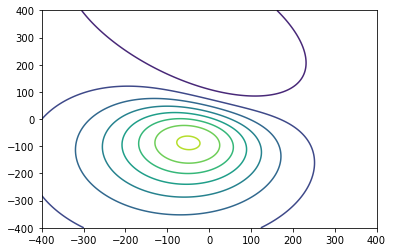

In [14]:
plt.figure()
plt.contour(Y, X, MagField, cmap='viridis')

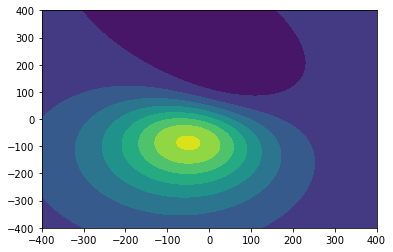

In [15]:
plt.figure()
plt.contourf(Y, X, MagField, cmap='viridis')

There's an optional arguement that we can give to contourf() to increase the number of contour lines.  Try running contourf(x,y,MagField,n=20)

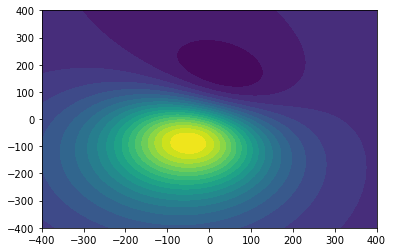

In [16]:
plt.figure()
plt.contourf(Y,X,MagField,20, cmap='viridis')

Now try running the command with 50 contour lines.

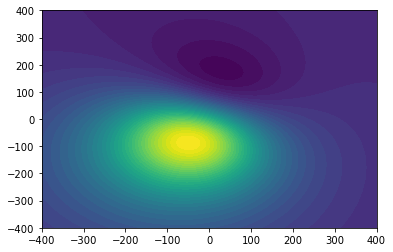

In [17]:
plt.figure()
plt.contourf(Y,X,MagField,50, cmap='viridis')

Generally speaking, we notice that the image looks nicer/smoother as we add more contour lines.  The next two functions, imshow() and pcolormesh(), can be thought of as similar to contourf(), but we increase the number of contour lines to the point where we really can't see the lines themselves, and the image looks continuous.

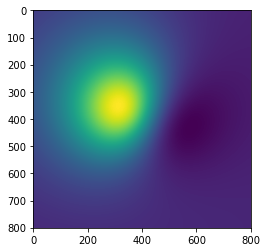

In [18]:
plt.figure()
plt.imshow(MagField, cmap='viridis')

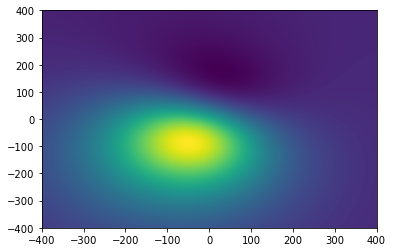

In [19]:
plt.figure()
plt.pcolormesh(Y, X, MagField, cmap='viridis')

All of these functions are displaying the same dataset but are doing it in different ways.  `plt.contour()` produces a plot similiar to an elevation map, where singular lines of equal value are drawn.  We can increase the number of lines, but there will usually always be some blank space between lines.  If we want to fill this white space, we can use the `plt.contourf()` function.  Instead of giving us colored lines, this function colors the space in between the lines.  Finally, we have `imshow()` and `pcolormesh()`, which look similar to the `contourf()` but "prettier" because we can't really pick out the individual contour lines.  (These functions actually don't use a "contour" scheme but rather a different process to draw the image.)  There's a couple differences between `imshow()` and `pcolormesh()`.  The first is that is that `imshow()` has its origin at the top left corner.  This is the standard convention in image processing but not so much in geophysics.  Additionally, we can't give `imshow()` a set of X and Y points to use as its axes, which sucks because as geophysicists we care very much about the spatial orientation of our plots.  `pcolormesh()` solves both of these problems, but as a tradeoff it is a little bit slower.

Which function you use to display your 2D results is largely a matter of personal choice as well as considering what aspects of the data you wish to emphasize.  For the most part, `plt.pcolormesh()` is a good go-to if you're not sure.

### Improving our plots

Most of the same functions used for editing 1D plots also apply to 2D plots, such as title, xlabel, ylabel, etc.

Text(0, 0.5, 'Northing (m)')

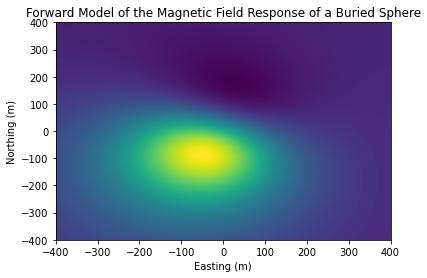

In [20]:
plt.figure()
plt.pcolormesh(Y, X, MagField, cmap='viridis')
plt.title("Forward Model of the Magnetic Field Response of a Buried Sphere")
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")

Our stakeholder meeting will not go well if we don't tell our stakeholders what units of the magnetic field they're seeing on this graph.  Let's show them using a `plt.colorbar()` function.  Also let's increase the size of our graph a bit by adding a figsize argument to our plt.figure() function.

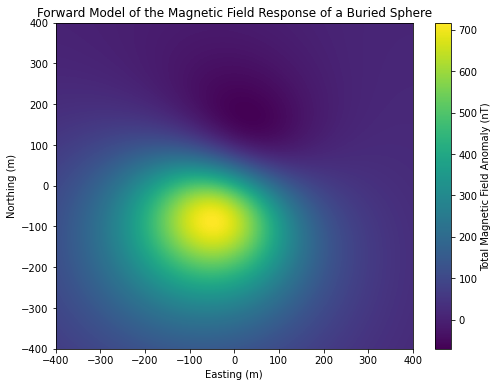

In [21]:
plt.figure(figsize=(8,6))
plt.pcolormesh(Y, X, MagField, cmap='viridis')
plt.title("Forward Model of the Magnetic Field Response of a Buried Sphere")
plt.ylabel("Northing (m)")
plt.xlabel("Easting (m)")
plt.colorbar(label='Total Magnetic Field Anomaly (nT)')

We give our figure a little bit more horizontal space in the figsize arguement to account for the presence of the colorbar.

Sweet, let's now repeat this process but with "actual" data.  Let's load in the magnetics data with np.genfromtxt(), and plot the data with pcolormesh.  We unfortunately don't have spatial data in the text file to go along with our magnetics data, but since you designed the survey, you know that the magnetics data was generated on a square grid with both northing and easting lines traversing 1.6 kilometers with a station spacing of 1 meter.  (In addition to being a wiz at magnetic field theory, you also have superspeed and can collect over two square kilometers of magnetics data in a day's work.)

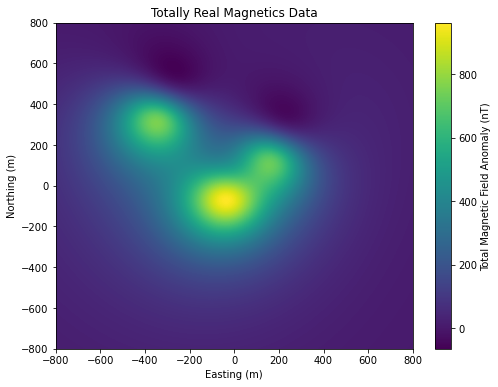

In [22]:
magneticsData = np.genfromtxt("sample_jupyter_notebook_data/MagneticsData.txt")
northing = np.arange(-800, 800+1)
easting = northing
X2,Y2 = np.meshgrid(easting, northing)
plt.figure(figsize=(8,6))
plt.pcolormesh(Y2, X2, magneticsData, cmap='viridis')
plt.title("Totally Real Magnetics Data")
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.colorbar(label='Total Magnetic Field Anomaly (nT)')

Based on our forward modelling, there definitely appear to be a few spherical anomalies in the ground.

## 3D Plots

Matplotlib can produce some awesome 3D plots as well, although it is not as robust as MATLAB (no slice views, etc.). This is because matplotlib does not truly render things in 3D. There are some smaller, less supported packages that can give you 3D plotting better suited for the geosciences, such as https://github.com/OpenGeoVis/PVGeo or https://docs.enthought.com/mayavi/mayavi/ For right now, we will just focus on the basics of 3D plotting using synthetic data using matplotlib. If the capabilities here do not wow you, then it may be worthwhile to look at other modules.  

Previously, I just called `plt.somemethod()` when I wanted to plot something.  That's one way of plotting in matplotlib.  The other way is to generate an *Axes* object and create plots using `axes.somemethod()`.  Many functions and methods are shared between these two approaches.  They're just two ways of skinning a cat.  For 3D plotting, we're also going to beef up matplotlib with an additional import.

In [23]:
from mpl_toolkits.mplot3d import Axes3D

I'm now going to generate an *axes* object that is projected into 3D. (In other words, this object is three dimensional instead of two dimensional).

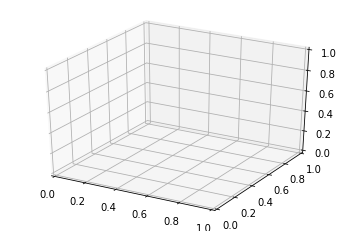

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Our beautiful axes object (named "ax") has nothing in it because we didn't give it anything to plot.  Let's just try plotting a line.

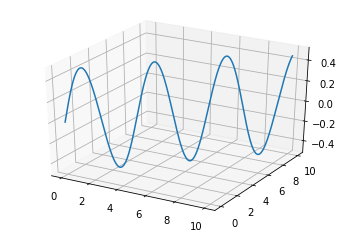

In [25]:
xPoints = np.arange(0, 10, 0.01)
yPoints = np.arange(0, 10, 0.01)
zPoints = [np.sin(xPoints[i])*np.cos(yPoints[i]) for i in range(len(xPoints))]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot = ax.plot(xPoints, yPoints, zPoints)

As we can see, it functions very similarly to plotting in 2d; we just also pass the function a list of z values in addition to some x values and y values.  If you're curious about the syntax I used to generate *zPoints*, you may want to Google "Python list comprehension".  It's a slick way to generate arrays from functions or other arrays. Anyway, let's try plotting our magnetics data in 3D, just to be fancy.

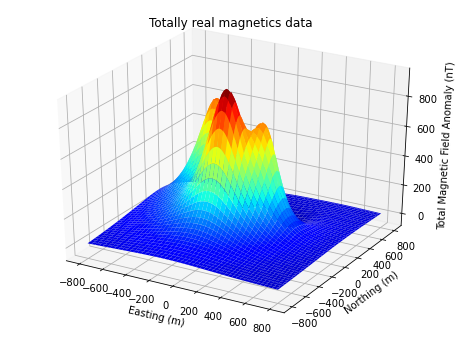

In [26]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
plot = ax.plot_surface(Y2, X2, magneticsData, cmap='jet')
ax.set_xlabel('Easting (m)')
ax.set_ylabel('Northing (m)')
ax.set_zlabel('Total Magnetic Field Anomaly (nT)')
title = ax.set_title('Totally real magnetics data')

*Axes* objects have a method `view_init()` that changes how we view the 3d plot.  We can, for instance, change the azimuth of our viewing angle to 30 degrees using `view_init(azim=30)`

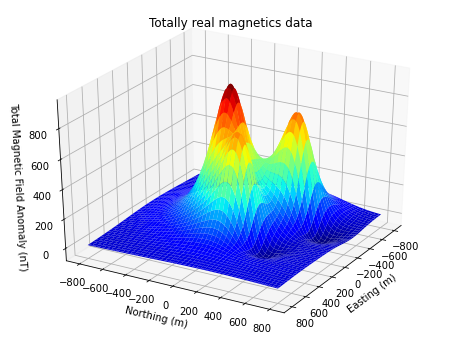

In [27]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
plot = ax.plot_surface(Y2, X2, magneticsData, cmap='jet')
ax.set_xlabel('Easting (m)')
ax.set_ylabel('Northing (m)')
ax.set_zlabel('Total Magnetic Field Anomaly (nT)')
title = ax.set_title('Totally real magnetics data')
ax.view_init(azim=30)

Or we can change our viewing elevation using `view_init(elev=15)`

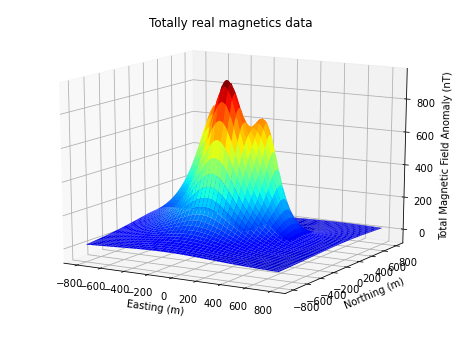

In [28]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
plot = ax.plot_surface(Y2, X2, magneticsData, cmap='jet')
ax.set_xlabel('Easting (m)')
ax.set_ylabel('Northing (m)')
ax.set_zlabel('Total Magnetic Field Anomaly (nT)')
title = ax.set_title('Totally real magnetics data')
ax.view_init(elev=15)

Finally, there are some ways to animate a 3D plot and interactively rotate it.  Unfortunately, these methods are heavily dependent on the version of matplotlib and IPython installed.  You also need to be running this notebook in Jupyter; Google Colab still needs to iron out some issues with how it handles animations. :( 

In Jupyter, you can try running the below code block to create an interactive plot.  You can rotate your view by holding down the left mouse button and dragging your mouse over the image.  Depending on your computer, the rotation may lag a bit, so you may need to be patient.  If your version of matplotlib, IPython, and python are not up to date or compatible, this code block may fail.  That's alright, interactive plots aren't necessary, just super cool.  

This code cell changes the matplotlib backend from inline (produce static images) to notebook (cool rotating stuff).  If you want to go back to static images when running any other code cells, you will need to run `% matplotlib inline` again (found at the very start of this notebook). 

<IPython.core.display.Javascript object>


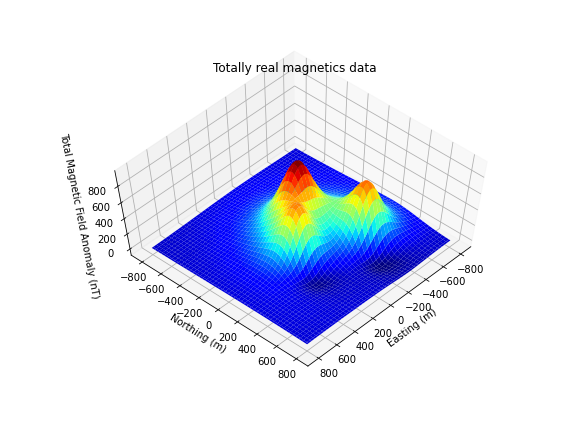

In [30]:
%matplotlib notebook
%matplotlib notebook 
# Jupyter is finicky so we run this magic command twice.

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
plot = ax.plot_surface(Y2, X2, magneticsData, cmap='jet')
ax.set_xlabel('Easting (m)')
ax.set_ylabel('Northing (m)')
ax.set_zlabel('Total Magnetic Field Anomaly (nT)')
title = ax.set_title('Totally real magnetics data')
fig.show()

https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html contains some great examples of various functions specific to 3d plotting, such as plot_surface(), wireframe(), and quiver(). 